In [23]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
import math

In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/final_dataset1.csv')

In [4]:
data = df.values
X, Y = data[:, :-1], data[:, -1]

In [5]:
#Perform Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)


In [18]:
def test_train_val_split(X,Y,test_percentage,train_percentage,val_percentage):
  # training : test : validation
  #    70    :  15  :    15

  temp = np.append(X,np.swapaxes(np.array([Y]),0,1),axis=1)
  np.random.shuffle(temp)

  tot = temp[:,0].size

  idx1 = (70*tot)//100
  idx2 = (85*tot)//100

  X_train = temp[:idx1,:-1]
  Y_train = temp[:idx1,-1]
  X_val = temp[idx1:idx2,:-1]
  Y_val = temp[idx1:idx2,-1]
  X_test = temp[idx2:,:-1]
  Y_test = temp[idx2:,-1]

  # print("training set size:",Y_train.size,"\nvalidation set size:",Y_val.size,"\ntesting set size:",Y_test.size)

  return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [19]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = test_train_val_split(X,Y,30,70,0)

In [7]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [12]:
df

,Unnamed: 0,Open1,Open2,Open3,Open4,Open5,High1,High2,High3,High4,...,Neutral4,Neutral5,Negative1,Negative2,Negative3,Negative4,Negative5,High,Low,Close
0,0,79.382858,79.167145,79.637146,80.545715,81.157143,79.575714,80.182854,80.012856,80.629997,...,0,0,6,0,0,0,0,79.099998,77.204285,77.282860
1,1,78.980003,79.382858,79.167145,79.637146,80.545715,79.099998,79.575714,80.182854,80.012856,...,0,0,7,6,0,0,0,78.114288,76.228569,77.704285
2,2,76.778572,78.980003,79.382858,79.167145,79.637146,78.114288,79.099998,79.575714,80.182854,...,0,0,4,7,6,0,0,77.994286,76.845711,77.148575
3,3,77.760002,76.778572,78.980003,79.382858,79.167145,77.994286,78.114288,79.099998,79.575714,...,12,0,5,4,7,6,0,77.937141,76.955711,77.637146
4,4,76.972855,77.760002,76.778572,78.980003,79.382858,77.937141,77.994286,78.114288,79.099998,...,6,12,0,5,4,7,6,78.122856,76.478569,76.645714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,503,107.010002,108.580002,106.959999,107.589996,109.000000,107.029999,108.699997,109.430000,107.690002,...,16,5,3,5,2,1,5,105.370003,102.000000,105.349998
504,504,102.610001,107.010002,108.580002,106.959999,107.589996,105.370003,107.029999,108.699997,109.430000,...,14,16,0,3,5,2,1,105.849998,102.410004,102.709999
505,505,105.750000,102.610001,107.010002,108.580002,106.959999,105.849998,105.370003,107.029999,108.699997,...,14,14,0,0,3,5,2,102.370003,99.870003,100.699997
506,506,100.559998,105.750000,102.610001,107.010002,108.580002,102.370003,105.849998,105.370003,107.029999,...,13,14,0,0,0,3,5,100.129997,96.430000,96.449997


In [22]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error  

In [25]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [26]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, Y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(Y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(Y_test, y_pred))
    print("\tMean squared error:", mean_squared_error(Y_test,y_pred))
    print("\tRoot mean squared error:",math.sqrt(mean_squared_error(Y_test,y_pred)))
    print("\tR2 score:", r2_score(Y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.002s
	Prediction time: 0.007s
	Explained variance: -0.11697689869595096
	Mean absolute error: 14.596032997402597
	Mean squared error: 293.81371862751337
	Root mean squared error: 17.140995263622045
	R2 score: -0.149132208957518

GradientBoostingRegressor()
	Training time: 0.425s
	Prediction time: 0.001s
	Explained variance: 0.9970763013817758
	Mean absolute error: 0.7135330045404048
	Mean squared error: 0.747623573438895
	Root mean squared error: 0.8646522847011363
	R2 score: 0.9970759761238253

ExtraTreesRegressor()
	Training time: 0.839s
	Prediction time: 0.009s
	Explained variance: 0.9969743441542124
	Mean absolute error: 0.6852439245454618
	Mean squared error: 0.7751890904661873
	Root mean squared error: 0.880448232700928
	R2 score: 0.9969681648765472

RandomForestRegressor()
	Training time: 1.040s
	Prediction time: 0.011s
	Explained variance: 0.9969761330322165
	Mean absolute error: 0.7063893085714301
	Mean squared error: 0.7737412299941956


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.557e+02, tolerance: 1.100e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.16688e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [27]:
from sklearn.model_selection import GridSearchCV

Gradient Boosting Hyperparameter Tuning


In [28]:
parameters = { 'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['friedman_mse', 'mse', 'mae'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [30]:
grid = GridSearchCV(GradientBoostingRegressor(),parameters)
model = grid.fit(X_sc,Y)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolut

{'criterion': 'mse', 'learning_rate': 0.5, 'loss': 'quantile', 'max_features': 'sqrt'} 

GradientBoostingRegressor(criterion='mse', learning_rate=0.5, loss='quantile',
                          max_features='sqrt') 



/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: 

In [34]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'criterion': 'mse', 'learning_rate': 0.5, 'loss': 'quantile', 'max_features': 'sqrt'} 

GradientBoostingRegressor(criterion='mse', learning_rate=0.5, loss='quantile',
                          max_features='sqrt') 



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


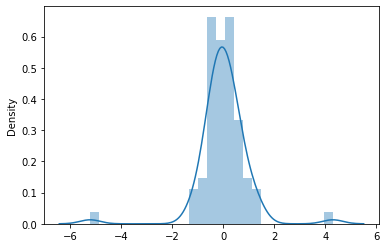

In [31]:
sns.distplot(y_pred-Y_test)

In [32]:
df_1 = pd.DataFrame(grid.cv_results_).set_index('rank_test_score').sort_index()

In [33]:
df_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_learning_rate,param_loss,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,
1,0.278837,0.007756,0.000668,0.000025,mse,0.5,quantile,sqrt,"{'criterion': 'mse', 'learning_rate': 0.5, 'lo...",-0.169018,-3.601473,0.849793,0.691349,0.589895,-0.327891,1.673900
2,0.602607,0.010857,0.001061,0.000633,mse,0.5,quantile,auto,"{'criterion': 'mse', 'learning_rate': 0.5, 'lo...",-5.860188,0.049969,0.944100,0.757187,0.880893,-0.645608,2.626819
3,5.714698,0.151360,0.000843,0.000094,mae,0.25,huber,auto,"{'criterion': 'mae', 'learning_rate': 0.25, 'l...",-6.803034,0.730471,0.980907,0.934842,0.917346,-0.647894,3.078755
4,0.111613,0.006030,0.000745,0.000020,mse,0.25,ls,sqrt,"{'criterion': 'mse', 'learning_rate': 0.25, 'l...",-6.621607,0.678169,0.935202,0.850313,0.874689,-0.656647,2.983702
5,0.396076,0.009618,0.000712,0.000021,mse,0.5,huber,log2,"{'criterion': 'mse', 'learning_rate': 0.5, 'lo...",-6.045549,0.283963,0.895507,0.769794,0.753169,-0.668623,2.696509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0.216613,0.007966,0.000654,0.000024,friedman_mse,0.05,quantile,log2,"{'criterion': 'friedman_mse', 'learning_rate':...",-39.241838,-2.887320,0.908605,0.820595,0.248538,-8.030284,15.667749
141,0.225281,0.006320,0.000722,0.000108,friedman_mse,0.05,quantile,sqrt,"{'criterion': 'friedman_mse', 'learning_rate':...",-38.432765,-7.607789,0.904406,0.871526,0.272589,-8.798407,15.162769
142,0.491432,0.017248,0.000675,0.000030,mse,0.05,quantile,auto,"{'criterion': 'mse', 'learning_rate': 0.05, 'l...",-45.651196,-18.639267,0.978715,0.932804,0.893991,-12.296991,18.319396


In [42]:

# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

Ridge Regularization and LR Hyperparameter Tuning

In [36]:
search = GridSearchCV(Ridge(), space, n_jobs=-1)
model = search.fit(X_sc,Y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [37]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'alpha': 1e-05, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'} 

Ridge(alpha=1e-05, normalize=True, solver='lsqr') 



In [69]:
df_1 = pd.DataFrame(search.cv_results_).set_index('rank_test_score').sort_index()

In [70]:
df_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,
1,0.911800,0.031203,0.002967,0.000128,mae,20,auto,15,"{'criterion': 'mae', 'max_depth': 20, 'max_fea...",-6.690096,0.793809,0.984215,0.936964,0.938374,-0.607347,3.042049
2,0.057053,0.001116,0.001805,0.000152,mae,20,sqrt,5,"{'criterion': 'mae', 'max_depth': 20, 'max_fea...",-6.287956,0.679059,0.934229,0.817211,0.753326,-0.620826,2.834802
3,0.615049,0.025194,0.002269,0.000055,mae,20,auto,10,"{'criterion': 'mae', 'max_depth': 20, 'max_fea...",-6.889408,0.730738,0.983763,0.947987,0.947917,-0.655801,3.118094
4,0.812085,0.010762,0.002738,0.000075,mae,7,auto,15,"{'criterion': 'mae', 'max_depth': 7, 'max_feat...",-7.040961,0.839521,0.984198,0.950179,0.939613,-0.665490,3.188100
5,1.251953,0.040554,0.003416,0.000070,mae,20,auto,20,"{'criterion': 'mae', 'max_depth': 20, 'max_fea...",-7.004636,0.778428,0.986545,0.951054,0.943323,-0.669057,3.168606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.012119,0.000119,0.001559,0.000032,mse,3,log2,5,"{'criterion': 'mse', 'max_depth': 3, 'max_feat...",-11.072096,-0.031132,0.890263,0.528191,0.592547,-1.818446,4.636404
222,0.081931,0.001201,0.002502,0.000128,mae,3,log2,15,"{'criterion': 'mae', 'max_depth': 3, 'max_feat...",-10.156423,-1.470171,0.890401,0.482044,0.764066,-1.898017,4.216894
223,0.111386,0.006962,0.002963,0.000075,mae,3,log2,20,"{'criterion': 'mae', 'max_depth': 3, 'max_feat...",-11.848977,0.363372,0.895905,0.221107,0.746794,-1.924360,4.968374


Lasso Regularization and LR Hyperparameter Tuning

In [52]:
# define search space
space = dict()
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

In [53]:
search = GridSearchCV(Lasso(), space, n_jobs=-1)
model = search.fit(X_sc,Y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [51]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [54]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'alpha': 0.001, 'fit_intercept': True, 'normalize': True} 

Lasso(alpha=0.001, normalize=True) 



In [71]:
df_1 = pd.DataFrame(search.cv_results_).set_index('rank_test_score').sort_index()
df_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,
1,0.911800,0.031203,0.002967,0.000128,mae,20,auto,15,"{'criterion': 'mae', 'max_depth': 20, 'max_fea...",-6.690096,0.793809,0.984215,0.936964,0.938374,-0.607347,3.042049
2,0.057053,0.001116,0.001805,0.000152,mae,20,sqrt,5,"{'criterion': 'mae', 'max_depth': 20, 'max_fea...",-6.287956,0.679059,0.934229,0.817211,0.753326,-0.620826,2.834802
3,0.615049,0.025194,0.002269,0.000055,mae,20,auto,10,"{'criterion': 'mae', 'max_depth': 20, 'max_fea...",-6.889408,0.730738,0.983763,0.947987,0.947917,-0.655801,3.118094
4,0.812085,0.010762,0.002738,0.000075,mae,7,auto,15,"{'criterion': 'mae', 'max_depth': 7, 'max_feat...",-7.040961,0.839521,0.984198,0.950179,0.939613,-0.665490,3.188100
5,1.251953,0.040554,0.003416,0.000070,mae,20,auto,20,"{'criterion': 'mae', 'max_depth': 20, 'max_fea...",-7.004636,0.778428,0.986545,0.951054,0.943323,-0.669057,3.168606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.012119,0.000119,0.001559,0.000032,mse,3,log2,5,"{'criterion': 'mse', 'max_depth': 3, 'max_feat...",-11.072096,-0.031132,0.890263,0.528191,0.592547,-1.818446,4.636404
222,0.081931,0.001201,0.002502,0.000128,mae,3,log2,15,"{'criterion': 'mae', 'max_depth': 3, 'max_feat...",-10.156423,-1.470171,0.890401,0.482044,0.764066,-1.898017,4.216894
223,0.111386,0.006962,0.002963,0.000075,mae,3,log2,20,"{'criterion': 'mae', 'max_depth': 3, 'max_feat...",-11.848977,0.363372,0.895905,0.221107,0.746794,-1.924360,4.968374


Linear Regression Hyperparameter Tuning

In [58]:
# define search space
space = dict()
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

In [59]:
search = GridSearchCV(LinearRegression(), space, n_jobs=-1)
model = search.fit(X_sc,Y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [60]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'fit_intercept': True, 'normalize': True} 

LinearRegression(normalize=True) 



In [ ]:
df_1 = pd.DataFrame(search.cv_results_).set_index('rank_test_score').sort_index()
df_1

In [65]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Decision Tree Regressor Hyperparameter Tuning

In [62]:
# define search space
space = dict()
space['criterion'] = ['friedman_mse', 'mse', 'mae']
space['max_depth'] = [3,7,11,15,20]
space['max_features'] = ['auto', 'sqrt', 'log2']

In [63]:
search = GridSearchCV(DecisionTreeRegressor(), space, n_jobs=-1)
model = search.fit(X_sc,Y)

In [64]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'criterion': 'friedman_mse', 'max_depth': 15, 'max_features': 'auto'} 

DecisionTreeRegressor(criterion='friedman_mse', max_depth=15,
                      max_features='auto') 



In [ ]:
df_1 = pd.DataFrame(search.cv_results_).set_index('rank_test_score').sort_index()
df_1

Random Forest Regressor Hyperparameter Tuning

In [66]:
# define search space
space = dict()
space['criterion'] = ['friedman_mse', 'mse', 'mae']
space['max_depth'] = [3,7,11,15,20]
space['max_features'] = ['auto', 'sqrt', 'log2']
space['n_estimators'] = [5,10,15,20,25]

In [67]:
search = GridSearchCV(RandomForestRegressor(), space, n_jobs=-1)
model = search.fit(X_sc,Y)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


In [68]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'criterion': 'mae', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 15} 

RandomForestRegressor(criterion='mae', max_depth=20, n_estimators=15) 

